In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys, json
from pathlib import Path

# 1. Projekt-Root nur einmal bestimmen
PROJECT_ROOT = Path.cwd().parent.resolve()

# 2. sys.path fürs Importieren um PROJECT_ROOT erweitern
sys.path.insert(0, str(PROJECT_ROOT))

In [3]:
import utils.nervousness_comparator as nerv_comparator

## I. weighted Flowtime

In [4]:
file = Path(PROJECT_ROOT, "data/04a_schedule_00.csv")

In [5]:
df_plan0_a =  pd.read_csv(file)
df_plan0_a = df_plan0_a.sort_values(by=["Arrival", "Start"]).reset_index(drop=True)
df_plan0_a

,Job,Operation,Arrival,Machine,Start,Processing Time,Flow time,End
0,Job_000,0,0.00,M0,0.00,29,29.00,29.00
1,Job_000,1,0.00,M1,29.00,78,107.00,107.00
2,Job_000,2,0.00,M2,107.00,9,116.00,116.00
3,Job_000,3,0.00,M3,116.00,36,152.00,152.00
4,Job_000,4,0.00,M4,152.00,49,201.00,201.00
...,...,...,...,...,...,...,...,...
565,Job_056,5,4309.61,M9,6068.39,76,1834.78,6144.39
566,Job_056,6,4309.61,M5,6268.39,47,2005.78,6315.39
567,Job_056,7,4309.61,M3,6315.39,52,2057.78,6367.39
568,Job_056,8,4309.61,M4,6367.39,90,2147.78,6457.39


In [6]:
df_plan1_a =  pd.read_csv(Path(PROJECT_ROOT, "data/04a_schedule_01.csv"))
df_plan1_a = df_plan1_a.sort_values(by=["Arrival", "Start"]).reset_index(drop=True)
df_plan1_a

,Job,Operation,Arrival,Machine,Start,Processing Time,Flow time,End
0,Job_010,6,891.94,M8,1507.15,19.0,634.21,1526.15
1,Job_010,7,891.94,M9,1526.15,48.0,682.21,1574.15
2,Job_012,3,1003.56,M9,1448.67,11.0,456.11,1459.67
3,Job_015,2,1197.28,M1,1505.93,22.0,330.65,1527.93
4,Job_015,3,1197.28,M5,1527.93,61.0,391.65,1588.93
...,...,...,...,...,...,...,...,...
570,Job_075,5,5749.61,M9,7705.39,76.0,2031.78,7781.39
571,Job_075,6,5749.61,M5,7781.39,47.0,2078.78,7828.39
572,Job_075,7,5749.61,M3,7828.39,52.0,2130.78,7880.39
573,Job_075,8,5749.61,M4,7980.39,90.0,2320.78,8070.39


In [7]:
df_plan2_a =  pd.read_csv(Path(PROJECT_ROOT, "data/04a_schedule_02.csv"))
df_plan2_a = df_plan2_a.sort_values(by=["Arrival", "Start"]).reset_index(drop=True)
df_plan2_a

,Job,Operation,Arrival,Machine,Start,Processing Time,Flow time,End
0,Job_027,7,2188.04,M7,2895.11,89.0,796.07,2984.11
1,Job_029,5,2331.94,M6,2895.11,88.0,651.17,2983.11
2,Job_038,0,2880.00,M0,2880.00,29.0,29.00,2909.00
3,Job_038,1,2880.00,M1,2909.00,78.0,107.00,2987.00
4,Job_038,2,2880.00,M2,2987.00,9.0,116.00,2996.00
...,...,...,...,...,...,...,...,...
567,Job_094,5,7189.61,M9,8740.89,76.0,1627.28,8816.89
568,Job_094,6,7189.61,M5,8816.89,47.0,1674.28,8863.89
569,Job_094,7,7189.61,M3,8863.89,52.0,1726.28,8915.89
570,Job_094,8,7189.61,M4,8915.89,90.0,1816.28,9005.89


In [8]:
df_plan3_a =  pd.read_csv(Path(PROJECT_ROOT, "data/04a_schedule_03.csv"))
df_plan3_a = df_plan3_a.sort_values(by=["Arrival", "Start"]).reset_index(drop=True)
df_plan3_a

,Job,Operation,Arrival,Machine,Start,Processing Time,Flow time,End
0,Job_047,9,3661.95,M7,4455.03,45.0,838.08,4500.03
1,Job_050,6,3883.56,M6,4341.70,46.0,504.14,4387.70
2,Job_050,7,3883.56,M5,4387.70,46.0,550.14,4433.70
3,Job_053,4,4077.28,M3,4424.72,26.0,373.44,4450.72
4,Job_053,5,4077.28,M4,4455.03,69.0,446.75,4524.03
...,...,...,...,...,...,...,...,...
570,Job_113,5,8629.61,M9,10607.78,76.0,2054.17,10683.78
571,Job_113,6,8629.61,M5,10683.78,47.0,2101.17,10730.78
572,Job_113,7,8629.61,M3,10730.78,52.0,2153.17,10782.78
573,Job_113,8,8629.61,M4,10782.78,90.0,2243.17,10872.78


In [9]:
T1 = 60 * 24 *1 
P_T_0a, details = nerv_comparator.compute_P_T(df_plan0_a, df_plan1_a, T1, verbose = True)
P_T_0a

                       Debug-Info  compute_P_T                        
Vorgänge nach T1              :        380
Planungshorizont T            :    8253.39
----------------------------------------------------------------------
Metric                            Min        Mean         Max
----------------------------------------------------------------------
delta_t (|t−t′|)                 4.00     1269.56     4094.46
g(t)                            0.011       0.336       0.951
----------------------------------------------------------------------
Beispiel-Zeilen (Top 5):
    Job  Operation Start_plan Start_rev delta_t     g contrib
Job_019          0   1,612.39  1,440.00  172.39 0.935  161.23
Job_019          1   1,734.39  1,527.93  206.46 0.893  184.46
Job_019          2   2,101.39  1,605.93  495.46 0.784  388.21
Job_019          3   2,110.39  1,614.93  495.46 0.781  386.99
Job_019          4   2,182.39  1,650.93  531.46 0.762  404.90
-----------------------------------------------

106822.51000937232

In [10]:
details 

,Job,Operation,Start_plan,Start_rev,delta_t,g,contrib
5,Job_019,0,1612.39,1440.00,172.39,0.935237,161.225558
6,Job_019,1,1734.39,1527.93,206.46,0.893462,184.464243
7,Job_019,2,2101.39,1605.93,495.46,0.783528,388.206801
8,Job_019,3,2110.39,1614.93,495.46,0.781080,386.994036
9,Job_019,4,2182.39,1650.93,531.46,0.761866,404.901282
...,...,...,...,...,...,...,...
380,Job_056,5,6068.39,5691.39,377.00,0.176136,66.403402
381,Job_056,6,6268.39,5767.39,501.00,0.157564,78.939778
382,Job_056,7,6315.39,5814.39,501.00,0.153286,76.796310
383,Job_056,8,6367.39,5917.39,450.00,0.148589,66.865260


In [11]:
def build_pt_table(plan_d: list,
                   minutes_per_day: int = 60 * 24,
                   horizon_mode: str = "fixed",
                   verbose: bool = False,
                   include_zero_row: bool = True) -> pd.DataFrame:
    if len(plan_d) < 2:
        raise ValueError("plan_d muss mindestens zwei Snapshots enthalten.")

    rows      = []
    base_plan = plan_d[0]

    for d in range(1, len(plan_d)):
        T1 = d * minutes_per_day

        # ---------- inkrementell  (Plan d-1 -> Plan d) ----------
        P_T_inc, _ = nerv_comparator.compute_P_T(plan_d[d-1], plan_d[d], T1, verbose=verbose)
        rows.append({'Base': d-1, 'Next': d, 'P_T': P_T_inc})


    # ---------- Ergebnis-DataFrame ----------
    df_rows = pd.DataFrame(rows, columns=['Base', 'Next', 'P_T'])

    if include_zero_row:
        df_rows = pd.concat([pd.DataFrame([{'Base': 0, 'Next': 0, 'P_T': 0}]), df_rows])

    result = df_rows.drop_duplicates().reset_index(drop=True)
    return result

result = build_pt_table([df_plan0_a, df_plan1_a, df_plan2_a, df_plan3_a])
result

,Base,Next,P_T
0,0,0,0.000000
1,0,1,106822.510009
2,1,2,113894.653512
3,2,3,77559.945011


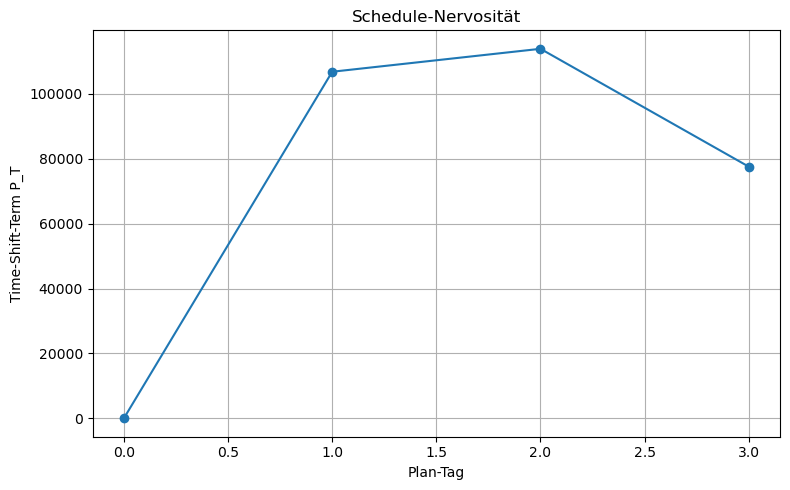

In [12]:
# Plot aus vorhandener DataFrame 'result'
plt.figure(figsize=(8, 5))
plt.plot(result['Next'], result['P_T'], marker='o', linestyle='-')
plt.xlabel('Plan-Tag')
plt.ylabel('Time-Shift-Term P_T')
plt.title("Schedule-Nervosität")
plt.grid(True)
plt.tight_layout()
plt.show()

## II. weighted Flowtime with bi_criteria Rescheduling

In [13]:
df_plan_wu_00 =  pd.read_csv(Path(PROJECT_ROOT, "data/05_schedule_00_original.csv"))
df_plan_wu_00

,Job,Operation,Arrival,Machine,Start,Processing Time,Flow time,End
0,Job_000,0,0.00,M0,0.00,29,29.00,29.00
1,Job_000,1,0.00,M1,29.00,78,107.00,107.00
2,Job_000,2,0.00,M2,107.00,9,116.00,116.00
3,Job_000,3,0.00,M3,116.00,36,152.00,152.00
4,Job_000,4,0.00,M4,152.00,49,201.00,201.00
...,...,...,...,...,...,...,...,...
375,Job_037,5,2869.61,M9,3798.57,76,1004.96,3874.57
376,Job_037,6,2869.61,M5,3874.57,47,1051.96,3921.57
377,Job_037,7,2869.61,M3,3921.57,52,1103.96,3973.57
378,Job_037,8,2869.61,M4,3973.75,90,1194.14,4063.75


In [14]:
df_plan_wu_01 =  pd.read_csv(Path(PROJECT_ROOT, "data/05_schedule_01_reschedule.csv"))
df_plan_wu_01

,Job,Operation,Arrival,Machine,Start,Processing Time,Flow time,End
0,Job_008,8,748.04,M4,1522.25,26.0,800.21,1548.25
1,Job_008,9,748.04,M8,1553.65,74.0,879.61,1627.65
2,Job_009,8,781.95,M4,1548.25,90.0,856.30,1638.25
3,Job_009,9,781.95,M7,1638.25,45.0,901.30,1683.25
4,Job_010,5,891.94,M6,1446.65,88.0,642.71,1534.65
...,...,...,...,...,...,...,...,...
203,Job_037,5,2869.61,M9,3798.57,76.0,1004.96,3874.57
204,Job_037,6,2869.61,M5,3874.57,47.0,1051.96,3921.57
205,Job_037,7,2869.61,M3,3921.57,52.0,1103.96,3973.57
206,Job_037,8,2869.61,M4,3973.75,90.0,1194.14,4063.75


In [15]:
T1 = 60 * 24 *1 
P_T_0wu, details = nerv_comparator.compute_P_T(df_plan_wu_00, df_plan_wu_01, T1, verbose = True)
P_T_0wu

                       Debug-Info  compute_P_T                        
Vorgänge nach T1              :        190
Planungshorizont T            :    4142.69
----------------------------------------------------------------------
Metric                            Min        Mean         Max
----------------------------------------------------------------------
delta_t (|t−t′|)                 0.00        0.79       77.17
g(t)                            0.010       0.367       0.989
----------------------------------------------------------------------
Beispiel-Zeilen (Top 5):
    Job  Operation Start_plan Start_rev delta_t     g contrib
Job_019          0   1,457.13  1,534.30   77.17 0.989   76.31
Job_019          1   1,554.25  1,563.30    9.05 0.928    8.40
Job_019          2   1,686.13  1,686.13    0.00 0.851    0.00
Job_019          3   1,727.25  1,727.25    0.00 0.828    0.00
Job_019          4   1,763.25  1,763.25    0.00 0.808    0.00
-----------------------------------------------

145.34391618450553

In [16]:
result_wu = build_pt_table([df_plan_wu_00, df_plan_wu_01])
result_wu

,Base,Next,P_T
0,0,0,0.000000
1,0,1,145.343916


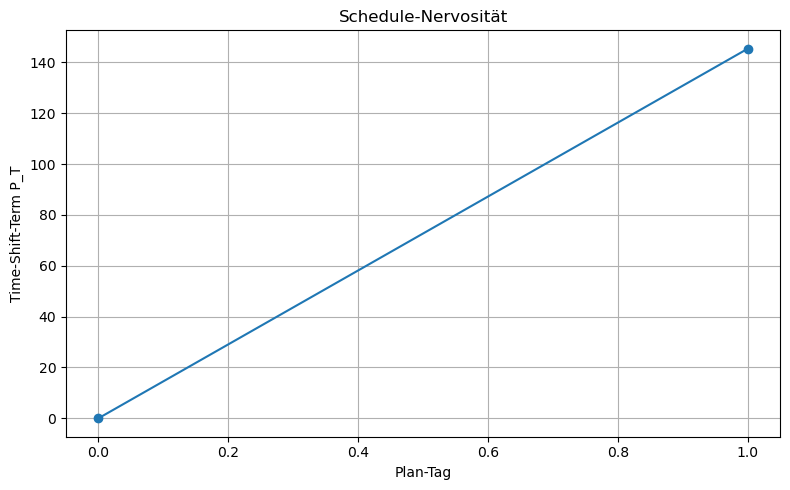

In [17]:
# Plot aus vorhandener DataFrame 'result'
plt.figure(figsize=(8, 5))
plt.plot(result_wu['Next'], result_wu['P_T'], marker='o', linestyle='-')
plt.xlabel('Plan-Tag')
plt.ylabel('Time-Shift-Term P_T')
plt.title("Schedule-Nervosität")
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
filt = details.delta_t > 0
details[filt]


,Job,Operation,Start_plan,Start_rev,delta_t,g,contrib
18,Job_019,0,1457.13,1534.3,77.17,0.988809,76.306385
19,Job_019,1,1554.25,1563.3,9.05,0.927747,8.396110
28,Job_020,0,1528.05,1592.3,64.25,0.943835,60.641422


In [25]:
rows, cols = details.shape
print(f"Gesamte Anzahl an Zeilen: {rows}")

Gesamte Anzahl an Zeilen: 190
